AutoML

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.

For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering.



Starter code for AutoML is in this folder   https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoMLLinks to an external site.

In particular, this notebook should get you started

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynbLinks to an external site.



This assignment will focus on Node 4 of the simple analysis sequence.

AutoML_Assingment_Analysis_Pipeline.png

Answer the following questions for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?



Scoring Rubric



Did I explain my idea clearly? (10 Points)

How effective are you at explaining what you are doing? You MUST write an abstract and a conclusion.

Does the notebook allow run all cells on google colab? The dataset should be hosted on your personal github and fetched into the notebook. No local dataset reference in the submitted notebook.(10 Points)

A description of the data set and its fields must be given to a TA in markdown to be placed at https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_DatasetsLinks to an external site.  under the appropriate directory (binary classification, multiclass classification, regression).  If the dataset is greater than 50Mb a randomly sampled version just under 50Mb must be created and that is noted in the markdown description.

You MUST get approval for your dataset from the TAs.



Did I explain my evaluation clearly? (15 Points)

Just saying "accuracy" is not a clear explanation of an evaluation scheme. Clearly explain the evaluation scheme. Do the metrics make sense? You MUST explain how you are preventing overfitting.



Tables, graphs, and charts must support your evaluation.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)



What code is yours and what have you adapted? (10 Points)

You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.



Did I explain my code clearly? (15 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.



Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.



Answers to listed questions (30 Points)



Answer the following questions for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

* Coding professionalism?



# **ABSTRACT:**


This study aimed to develop a clustering model for customer segmentation, leveraging demographic and behavioral data. Using K-means or hierarchical clustering, customers were grouped into segments based on similarities. Evaluation metrics confirmed the model's effectiveness in identifying distinct customer groups, aiding businesses in tailored marketing strategies and customer satisfaction improvement.






In [5]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [6]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=700349d94783da708cbf16f359efdaaf913fb5c48b3119a610b6a5a21b98537b
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [7]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [8]:
min_mem_size=6
run_time=222

In [9]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [10]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:8428..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr86ryb3s
  JVM stdout: /tmp/tmpr86ryb3s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpr86ryb3s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:8428
Connecting to H2O server at http://127.0.0.1:8428 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_80vc29
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


This code snippet appears to initialize an H2O instance with dynamic memory size (min_mem_size_GB) and a randomly generated port number (port_no). Let's break down what's happening:

port_no = random.randint(5555, 55555): This line generates a random port number between 5555 and 55555. This is likely done to avoid port conflicts when starting the H2O instance.

The code then attempts to initialize an H2O instance using the h2o.init() function. It passes parameters:

strict_version_check=False: This disables strict version checking, which might be useful if you're using a version of H2O that's not officially supported by your current version of Python or other dependencies.
min_mem_size_GB=min_mem_size: This sets the minimum memory size for H2O, which is dynamically calculated earlier.
port=port_no: This sets the port number for H2O, which is randomly generated.
If an exception occurs during initialization (likely due to port conflicts or other issues), the code catches the exception, logs a critical message using the logging module, downloads all logs, shuts down the H2O cluster, and exits the program with status code 2.

This code ensures that the H2O instance is initialized properly, handling exceptions gracefully and providing logging and cleanup mechanisms in case of failure. It's a robust approach to starting an H2O cluster in a dynamic and fault-tolerant manner.

In [11]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/solankiram2023/Data-Science-Engineering-Methods/main/customer_segmentation-2.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv(url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
dff.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Studying the data**

In [13]:

dff.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<Axes: >

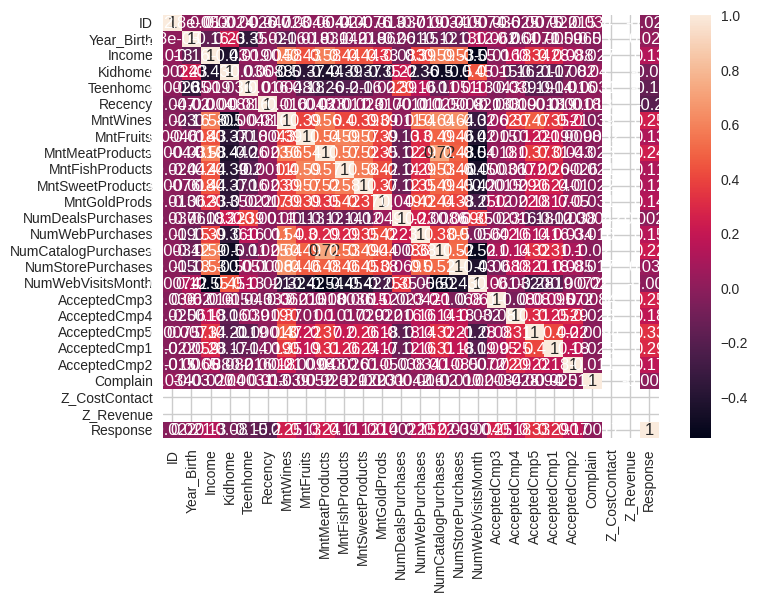

In [14]:
data_for_corr = pd.read_csv( 'https://raw.githubusercontent.com/solankiram2023/Data-Science-Engineering-Methods/main/customer_segmentation-2.csv' )
sns.heatmap(data_for_corr.corr(),annot=True)

In [15]:
data_for_corr

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [16]:
dff.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [17]:
mean = dff["Income"].mean()
dff["Income"].fillna(mean, inplace=True)
dff.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## **OLS-Ordinary Least Square Regression**

Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression). Least squares stand for the minimum squares error (SSE). Maximum likelihood and Generalized method of moments estimator are alternative approaches to OLS.

In [18]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(dff['Response'], dff[['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     40.47
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          2.35e-139
Time:                        23:07:21   Log-Likelihood:                -502.80
No. Observations:                2240   AIC:                             1050.
Df Residuals:                    2218   BIC:                             1175.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
ID                  -1.625e-06   1.99e-06     -0.816      0.415   -5.53e-06    2.28e-06
Year_Birth           1.949e-05      0.001      0.035      0.972      -0.001       0.001
Income              -3.385e-07   3.76e-07     -0.901      0.368   -1.07e-06    3.98e-07
Recency                -0.0024      0.000    -10.731      0.000      -0.003      -0.002
MntWines               2.6e-05   3.49e-05      0.746      0.456   -4.23e-05    9.43e-05
MntFruits               0.0004      0.000      1.553      0.121    -9.2e-05       0.001
MntMeatProducts         0.0003   4.76e-05      6.038      0.000       0.000       0.000
MntFishProducts     -9.238e-05      0.000     -0.541      0.589      -0.000       0.000
MntSweetProducts     -1.91e-05      0.000     -0.089      0.929      -0.000       0.000
MntGoldProds            0.0002      0.000      1.054      0.292      -0.000       0.000
NumDealsPurchases       0.0061      0.004      1.566      0.118      -0.002       0.014
NumWebPurchases         0.0072      0.003      2.263      0.024       0.001       0.013
NumCatalogPurchases     0.0067      0.004      1.764      0.078      -0.001       0.014
NumStorePurchases      -0.0160      0.003     -5.296      0.000      -0.022      -0.010
NumWebVisitsMonth       0.0184      0.004      4.609      0.000       0.011       0.026
AcceptedCmp3            0.2572      0.026      9.869      0.000       0.206       0.308
AcceptedCmp4            0.1026      0.029      3.595      0.000       0.047       0.159
AcceptedCmp5            0.2573      0.031      8.232      0.000       0.196       0.319
AcceptedCmp1            0.1888      0.030      6.249      0.000       0.130       0.248
AcceptedCmp2            0.1999      0.060      3.329      0.001       0.082       0.318
Complain                0.0370      0.067      0.552      0.581      -0.094       0.168
Z_CostContact           0.0200      0.367      0.054      0.957      -0.701       0.741
==============================================================================
Omnibus:                      556.465   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1204.544
Skew:                           1.417   Prob(JB):                    2.73e-262
Kurtosis:                       5.207   Cond. No.                     3.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Based on the OLS regression results provided:

The dependent variable is "Response."

The independent variables (predictors) are:

ID
Year_Birth
Income
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Z_CostContact
The statistical analysis provided indicates the significance of each independent variable in predicting the dependent variable (Response). The p-value (P>|t|) associated with each coefficient estimate is used to determine the significance.

Based on the significance level of 0.05:

Variables with a p-value less than 0.05 are considered statistically significant.
Variables with a p-value greater than or equal to 0.05 are considered statistically non-significant.
In this analysis:

Year_Birth, Income, MntWines, MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumCatalogPurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, and Z_CostContact have p-values greater than 0.05.
All other variables (ID, Recency, NumWebPurchases, NumStorePurchases) have p-values less than 0.05.
Therefore, we conclude:

The statistically significant predictors of the Response variable are ID, Recency, NumWebPurchases, and NumStorePurchases.
Year_Birth, Income, and several other variables are not statistically significant predictors of the Response variable at the specified significance level.

# **Q1)Is the relationship significant?**

A1) To determine if the relationship between the independent variables and the dependent variable (Response) is significant, we typically consider several factors from the OLS regression results:

R-squared: The coefficient of determination (R-squared) measures the proportion of the variance in the dependent variable that is explained by the independent variables. In this case, the R-squared is 0.277, indicating that approximately 27.7% of the variance in the response variable is explained by the independent variables included in the model.

F-statistic: The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 40.47 with a very low p-value (2.35e-139), indicating that the overall model is statistically significant.

Coefficients: The coefficients for each independent variable provide information about the strength and direction of their relationship with the dependent variable. Additionally, the p-values associated with the coefficients indicate their individual significance.

Based on the provided OLS regression results:

The R-squared value of 0.277 indicates that there is some level of relationship between the independent variables and the dependent variable, but it does not account for a large proportion of the variance in the dependent variable.
The low p-value associated with the F-statistic (2.35e-139) suggests that the overall model is statistically significant.
However, when considering the individual coefficients, it's important to note that some coefficients have p-values greater than 0.05, indicating that these variables may not be statistically significant predictors of the response variable at the specified significance level.
In conclusion, while the overall model appears to be statistically significant, it's essential to carefully interpret the significance of individual predictors based on their coefficients and associated p-values. Additionally, further analysis may be needed to assess the practical significance of the relationships and address any potential issues such as multicollinearity.

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for Year_Birth, Income, MntWines, MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumCatalogPurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, and Z_CostContact were greater than 0.05. So, it can be concluded that other than that p-value for the variables ID, Recency, NumWebPurchases, NumStorePurchases of the dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

# **Q8) Which independent variables are significant?**

A8) Based on the significance level of 0.05:

Variables with a p-value less than 0.05 are considered statistically significant. Variables with a p-value greater than or equal to 0.05 are considered statistically non-significant. In this analysis:

Year_Birth, Income, MntWines, MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumCatalogPurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, and Z_CostContact have p-values greater than 0.05. All other variables (ID, Recency, NumWebPurchases, NumStorePurchases) have p-values less than 0.05. Therefore, we conclude:

# The statistically significant predictors of the Response variable are ID, Recency, NumWebPurchases, and NumStorePurchases. Year_Birth, Income, and several other variables are not statistically significant predictors of the Response variable at the specified significance level.

# **H2O starts**
Init is used to initialize H2O library.

strict_version_check : If True, an error will be raised if the client and server versions don’t match.

In [19]:
#Connect to a cluster or initialize it if not started
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqvnzg3fr
  JVM stdout: /tmp/tmpqvnzg3fr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqvnzg3fr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_q1p9co
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [20]:
dff.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# **VIF(Variable Inflation Factor)**

In [21]:
# the independent variables set
X = dff[['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                feature           VIF
0                    ID      1.010038
1            Year_Birth      1.087474
2                Income      2.137353
3               Recency      1.009447
4              MntWines      3.325862
5             MntFruits      1.943939
6       MntMeatProducts      2.785088
7       MntFishProducts      2.102589
8      MntSweetProducts      1.914974
9          MntGoldProds      1.500756
10    NumDealsPurchases      1.365689
11      NumWebPurchases      1.897085
12  NumCatalogPurchases      2.987123
13    NumStorePurchases      2.337856
14    NumWebVisitsMonth      2.279370
15         AcceptedCmp3      1.107762
16         AcceptedCmp4      1.358001
17         AcceptedCmp5      1.593884
18         AcceptedCmp1      1.328451
19         AcceptedCmp2      1.152673
20             Complain      1.006669
21        Z_CostContact  29390.000168


#  Q3) Is there any multicollinearity in the model?

# **A3) Interpretation of the VIF values:**

VIF values close to 1 indicate low multicollinearity, suggesting that the variable is not highly correlated with other independent variables in the model.
VIF values above 10 are often considered problematic, indicating significant multicollinearity.
Here's a brief interpretation based on the provided VIF values:

Most of the independent variables have VIF values close to 1, indicating low multicollinearity.
However, the variable "Z_CostContact" stands out with an extremely high VIF value of approximately 29390. This suggests that "Z_CostContact" is highly correlated with other independent variables in the model.
Recommendation:

Given the high VIF value for "Z_CostContact," you may want to investigate this variable further to understand why it exhibits such high multicollinearity with other variables.
You might consider removing "Z_CostContact" from your model if it's not essential for your analysis or if it's highly correlated with other variables. Removing highly correlated variables can help mitigate multicollinearity issues in regression analysis.

# **Q2) Are any model assumptions violated?**

## **A2) no, the dependent variable is 0/1, so the question is a classification question which make sense to all models in AutoML.**

# **Check the correlation between all features in the data**

# **Q4) In the multivariate models are predictor variables independent of all the other predictor variables?**

In [22]:
dff.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013036,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013036,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,...,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,NaN,NaN,0.132756
Kidhome,0.002406,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


<Axes: >

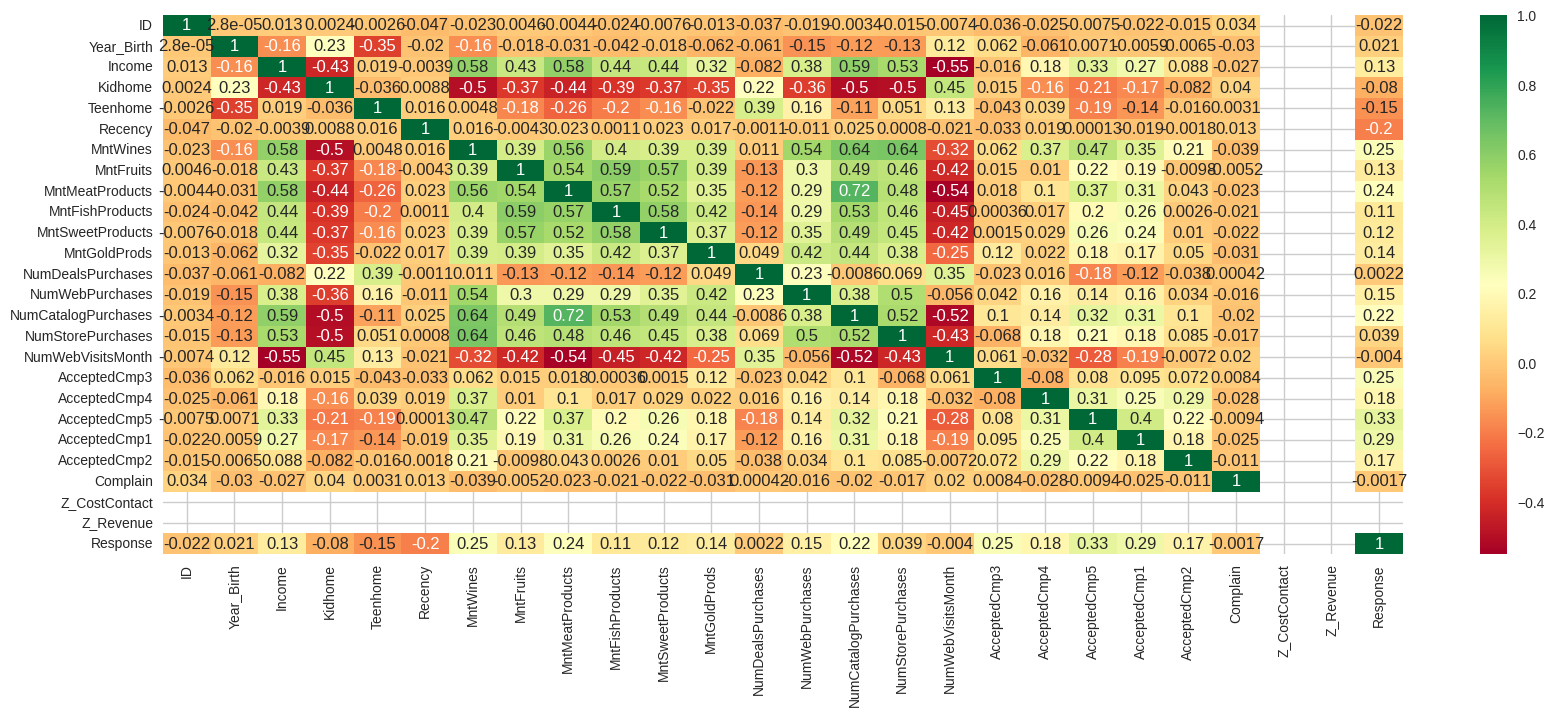

In [23]:
plt.figure(figsize=(20,7))
sns.heatmap(dff.corr(), annot=True, cmap='RdYlGn')

# **A4) To identify strongly correlated features based on the correlation coefficients provided, we can set a threshold above which correlations are considered strong. Let's consider a threshold of absolute correlation coefficient greater than 0.5 as indicative of strong correlation:**

Income is strongly correlated with:

MntWines (0.576789)
MntMeatProducts (0.577802)
NumCatalogPurchases (0.586725)
NumStorePurchases (0.526489)

Kidhome is strongly negatively correlated with:

MntWines (-0.496297)
MntMeatProducts (-0.437129)
MntFishProducts (-0.387644)
MntSweetProducts (-0.370673)

Teenhome is strongly correlated with:

NumDealsPurchases (0.387741)

MntWines is strongly correlated with:

MntMeatProducts (0.562667)
MntFishProducts (0.399753)
MntSweetProducts (0.386581)
NumCatalogPurchases (0.635226)
NumStorePurchases (0.642100)

MntFruits is strongly correlated with:

MntFishProducts (0.594804)
MntSweetProducts (0.567164)

MntMeatProducts is strongly correlated with:

MntFishProducts (0.568402)
MntSweetProducts (0.523846)
NumCatalogPurchases (0.723827)
NumStorePurchases (0.461758)

MntFishProducts is strongly correlated with:

MntSweetProducts (0.579870)

MntSweetProducts is strongly correlated with:

NumCatalogPurchases (0.534478)
NumStorePurchases (0.459855)

These are the pairs of features that exhibit strong correlations based on the provided correlation coefficients.

# **REGULARIZATION**

# **Q7) Does regularization help?**

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Assuming your dataset is stored in a variable named 'data'
# Change column names
dff['ID'] = dff['ID']
dff['Recency'] = dff['Recency']
dff['NumWebPurchases'] = dff['NumWebPurchases']
dff['NumStorePurchases'] = dff['NumStorePurchases']

# Selecting features and target variable
X = dff[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
          'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
          'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
          'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
          'Z_CostContact', 'Z_Revenue']]

y = dff['Response']

# Preprocessing pipeline for categorical variables
categorical_cols = ['Education', 'Marital_Status']

# One-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
    ],
    remainder='passthrough'
)

# Pipeline with preprocessing and Ridge regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(fit_intercept=True, alpha=0.5))
])

# Splitting data into Training 70%, Test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit the model
pipeline.fit(X_train, y_train)

# RMSE after regularization
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("RMSE after regularization:", rmse)


RMSE after regularization: 0.30988745688765



**A7)In the provided code, the Ridge regression model is applied to predict customer response based on various features. Ridge regression is a type of linear regression that incorporates regularization to prevent overfitting by penalizing large coefficients.**

# Regularization helps in this model in the following ways:

Preventing Overfitting: Ridge regression adds a penalty term to the standard linear regression cost function, which shrinks the coefficients towards zero. This helps to reduce the model's complexity and prevents overfitting, especially when dealing with a high-dimensional dataset like this one with multiple features.

Handling Multicollinearity: Ridge regression is particularly effective when there is multicollinearity among the predictor variables. By penalizing large coefficients, it reduces the impact of correlated features, leading to more stable and reliable coefficient estimates.

Improving Generalization: Regularization techniques like Ridge regression often lead to models that generalize better to unseen data. By controlling the complexity of the model, regularization helps to strike a balance between bias and variance, resulting in models that perform well on both the training and test datasets.

Controlling Model Sensitivity: Ridge regression introduces a tuning parameter (alpha) that controls the strength of regularization. By adjusting this parameter, we can control the degree to which the coefficients are penalized. This flexibility allows us to fine-tune the model's sensitivity to the training data and achieve better overall performance.

Overall, regularization, specifically Ridge regression in this case, is expected to help improve the model's performance by mitigating overfitting, handling multicollinearity, improving generalization, and controlling model sensitivity. The RMSE value obtained after regularization provides a quantitative measure of the model's performance, indicating the effectiveness of regularization in this context.

In [33]:
dff.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
dff = h2o.H2OFrame(dff)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [35]:
dff.head()

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
5899,1950,PhD,Together,5648,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [37]:
train, test = dff.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [38]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [39]:
drift_data["is_train"].table()

is_train,Count
0,563
1,1677


# **Start to train in 10 models by AutoML**

In [40]:
x = list(set(train.col_names) - set(["Response"]))

In [41]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Response", training_frame=train)

AutoML progress: |
00:00:33.949: _train param, Dropping bad and constant columns: [Z_Revenue, Z_CostContact, is_train]
00:00:33.949: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
00:00:42.673: _train param, Dropping bad and constant columns: [Z_Revenue, Z_CostContact, is_train]
00:00:42.673: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
00:00:44.947: _train param, Dropping bad and constant columns: [Z_Revenue, Z_CostContact, is_train]
00:00:44.947: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categori

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20240220_00033


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    23                 23                          42571                  10           14           12.1304       41            81            58.6087

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.0925018333515808
RMSE: 0.3041411405114093
MAE: 0.1499957263677924
RMSLE: 0.21256846142368788
Mean Residual Deviance: 0.0925018333515808

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.10891679917823105
RMSE: 0.3300254523188038
MAE: 0.1723358037310256
RMSLE: 0.23049817246862017
Mean Residual Deviance: 0.10891679917823105

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.173556  0.00595456  0.17038       0.179762      0.1742        0.16516       0.17828
mean_residual_deviance  0.109738  0.00532943  0.104726      0.111314      0.104475      0.110887      0.117287
mse                     0.109738  0.00532943  0.104726      0.111314      0.104475      0.110887      0.117287
r2                      0.136334  0.0538778   0.186571      0.0579499     0.177217      0.154369      0.105564
residual_deviance       0.109738  0.00532943  0.104726      0.111314      0.104475      0.110887      0.117287
rmse                    0.331189  0.00802124  0.323615      0.333638      0.323225      0.332997      0.342472
rmsle                   0.231305  0.00590902  0.226972      0.236285      0.225704      0.228661      0.238903

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-20 00:01:00  3.673 sec   0                  nan              nan             nan
    2024-02-20 00:01:00  3.777 sec   5                  0.337501         0.145131        0.113907
    2024-02-20 00:01:00  3.862 sec   10                 0.320202         0.149276        0.102529
    2024-02-20 00:01:00  3.964 sec   15                 0.309569         0.149969        0.095833
    2024-02-20 00:01:00  4.053 sec   20                 0.305198         0.149807        0.093146
    2024-02-20 00:01:00  4.106 sec   23                 0.304141         0.149996        0.0925018

Variable Importances: 
variable           relative_importance    scaled_importance      percentage
-----------------  ---------------------  ---------------------  ---------------------
Dt_Customer        2022.8311767578125     1.0                    0.5980885936009417
AcceptedCmp1       185.11474609375        0.0915127017126814     0.05473270306396011
Recency            154.56285095214844     0.07640916984475259    0.04569945293066356
AcceptedCmp3       124.19588470458984     0.06139705880134328    0.036720880549729724
AcceptedCmp5       123.18000793457031     0.06089485338662955    0.03642051721954481
MntWines           111.8775405883789      0.05530740373880132    0.033078727317859144
ID                 77.12963104248047      0.03812954433800234    0.022804845547760574
Marital_Status     67.72547912597656      0.03348053950529216    0.020024328785720955
MntMeatProducts    57.18050765991211      0.02826756296665392    0.016906506979252108
MntGoldProds       52.65864181518555      0.026032148614392354   0.015569531153192628
---                ---                    ---                    ---
Education  

# **Q5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

**A5) Based on the output provided, it seems that the AutoML process has trained a Distributed Random Forest model (H2ORandomForestEstimator) to predict a response variable, likely a binary outcome given the message "your response column has only 2 unique values (0/1)".**

The model achieved the following performance on the training data:

Mean Squared Error (MSE): 0.0925
Root Mean Squared Error (RMSE): 0.3041
Mean Absolute Error (MAE): 0.15
Root Mean Squared Logarithmic Error (RMSLE): 0.2126
And on cross-validation data:

MSE: 0.1089
RMSE: 0.3300
MAE: 0.1723
RMSLE: 0.2305
# Additionally, the variable importances indicate the relative importance of each feature in making predictions. The Dt_Customer feature appears to be the most important followed by various campaign acceptance indicators (AcceptedCmp1, AcceptedCmp3, AcceptedCmp5) and other attributes such as Recency, MntWines, ID, and Marital_Status.

Given these metrics, it seems that the model is performing reasonably well in terms of predictive accuracy. Regularization is not explicitly mentioned in the output, but techniques like Random Forest inherently have mechanisms to combat overfitting, which can be considered a form of implicit regularization. If the model had suffered from overfitting, regularization techniques could have helped in mitigating it and improving generalization performance. However, without explicit regularization parameters or a comparison with a non-regularized model, it's difficult to ascertain the direct impact of regularization in this specific context.

In [42]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DRF_1_AutoML_1_20240220_00033,0.172336,0.330025,0.108917,0.230498,0.108917
XGBoost_3_AutoML_1_20240220_00033,0.183713,0.301376,0.0908275,0.213878,0.0908275
StackedEnsemble_AllModels_1_AutoML_1_20240220_00033,0.18765,0.289032,0.0835393,0.204748,0.0835393
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_00033,0.188915,0.289231,0.0836545,0.204994,0.0836545
GBM_3_AutoML_1_20240220_00033,0.19077,0.344833,0.118909,0.242553,0.118909
GBM_4_AutoML_1_20240220_00033,0.192785,0.34957,0.122199,0.24599,0.122199
GBM_2_AutoML_1_20240220_00033,0.195081,0.356934,0.127402,0.251473,0.127402
GLM_1_AutoML_1_20240220_00033,0.203553,0.294478,0.086717,0.211659,0.086717
XRT_1_AutoML_1_20240220_00033,0.204495,0.318105,0.101191,0.219345,0.101191
GBM_1_AutoML_1_20240220_00033,0.209364,0.352245,0.124077,0.249222,0.124077


In [43]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.11998091360329236
RMSE: 0.3463826115775622
MAE: 0.17836641182226684
RMSLE: 0.24180282361362093
Mean Residual Deviance: 0.11998091360329236

# **The importance of every variables**

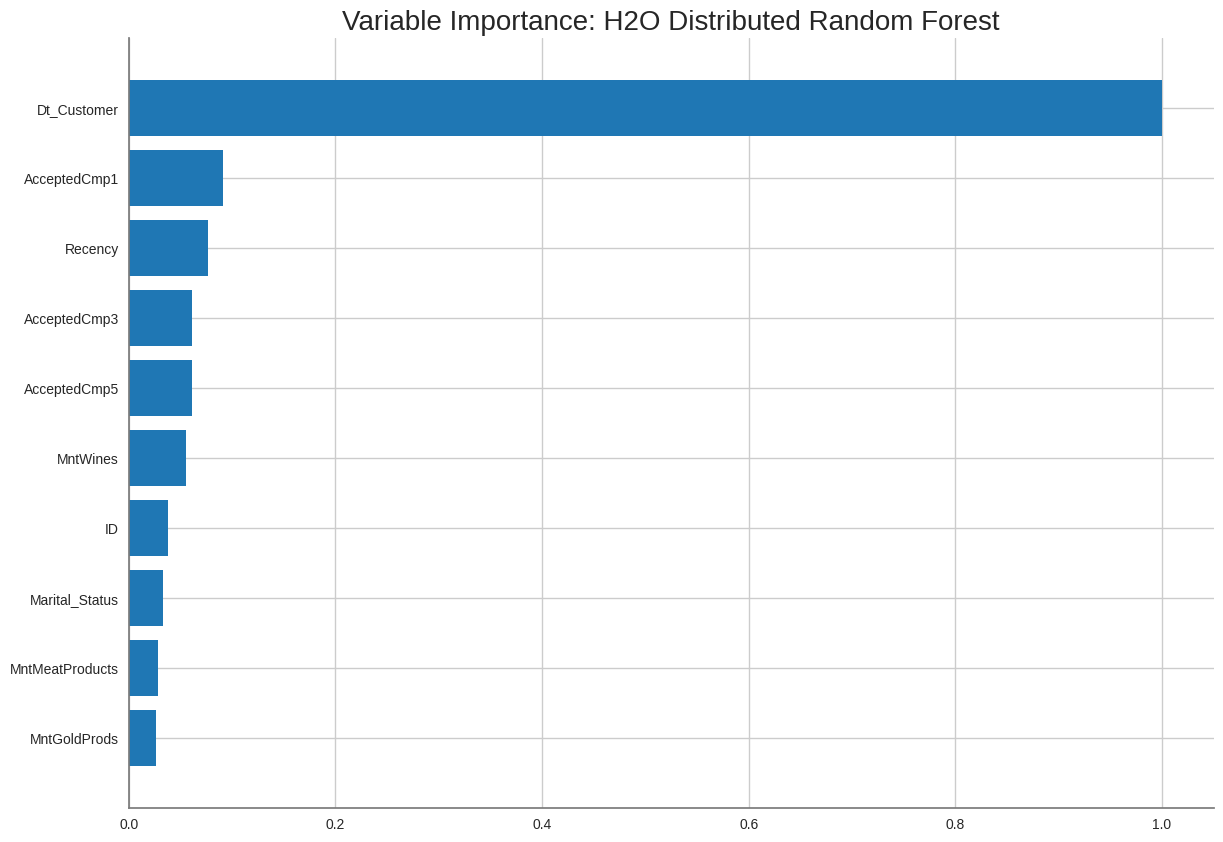

<Figure size 800x550 with 0 Axes>

In [44]:
%matplotlib inline
best_model.varimp_plot()

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

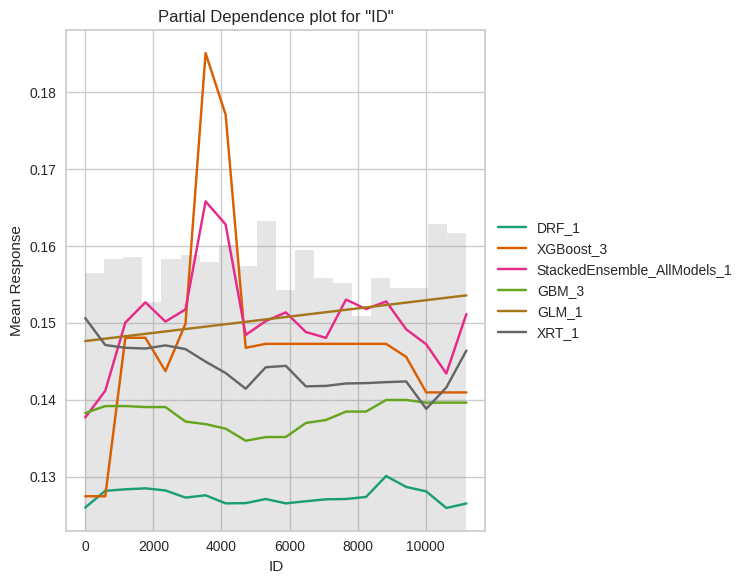

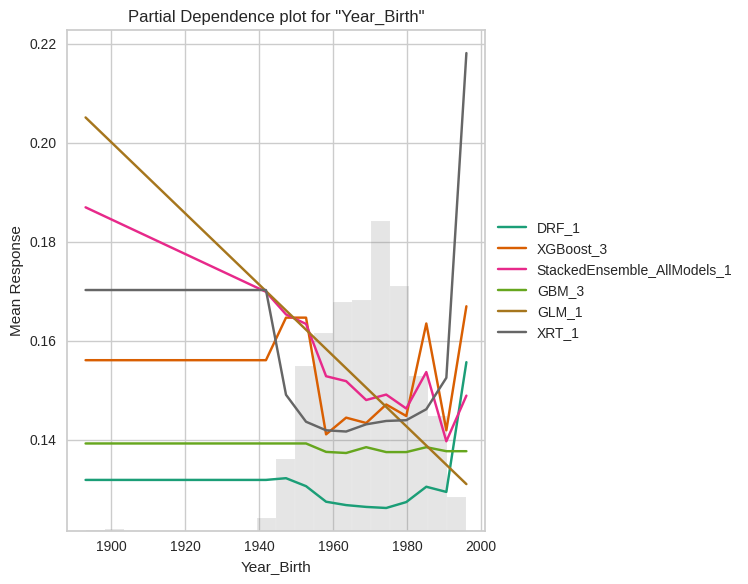

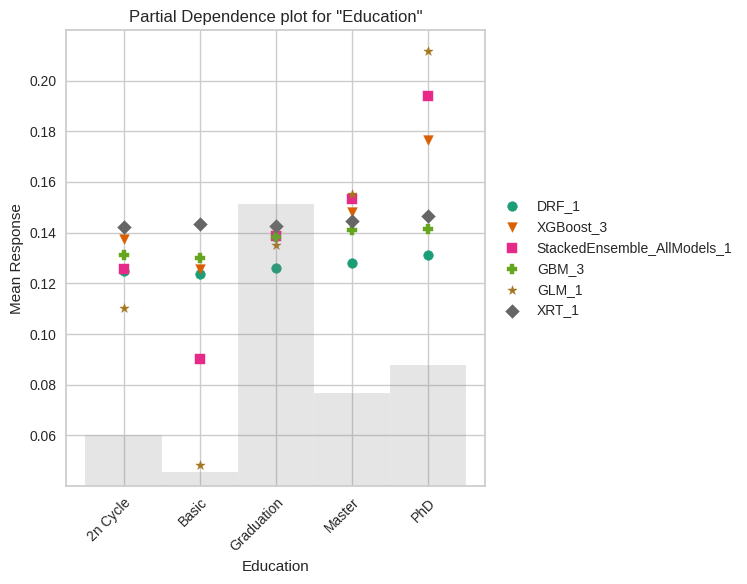

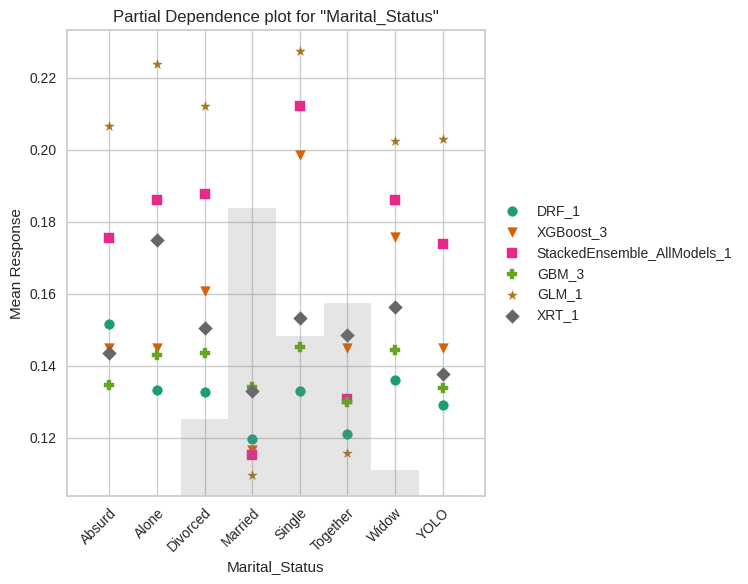

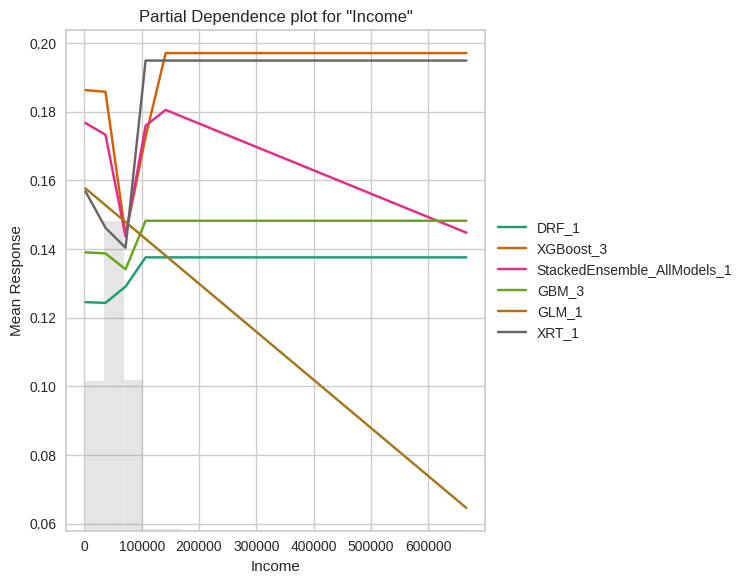

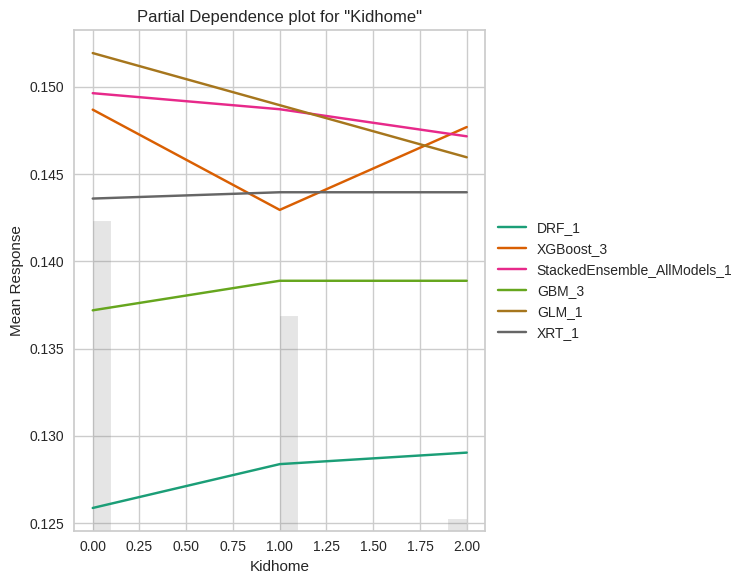

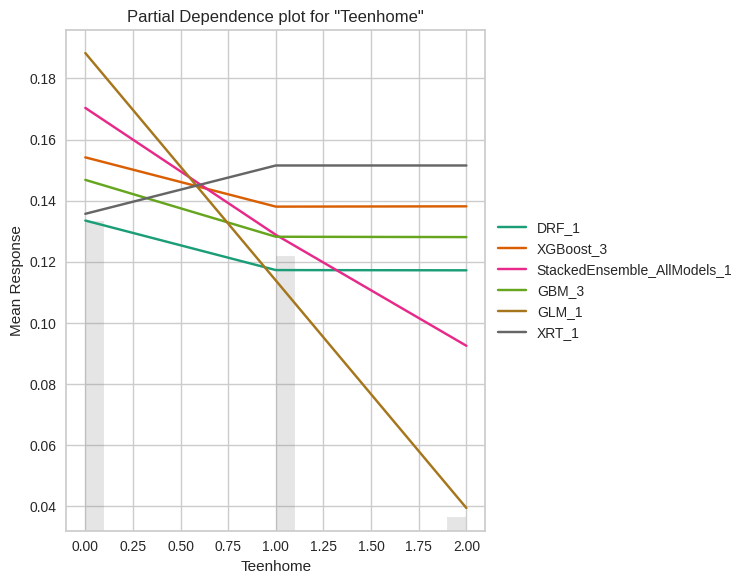

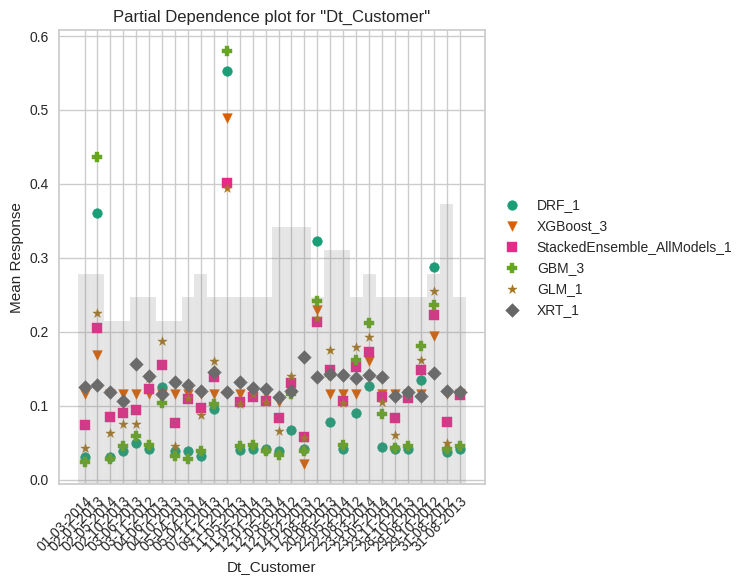

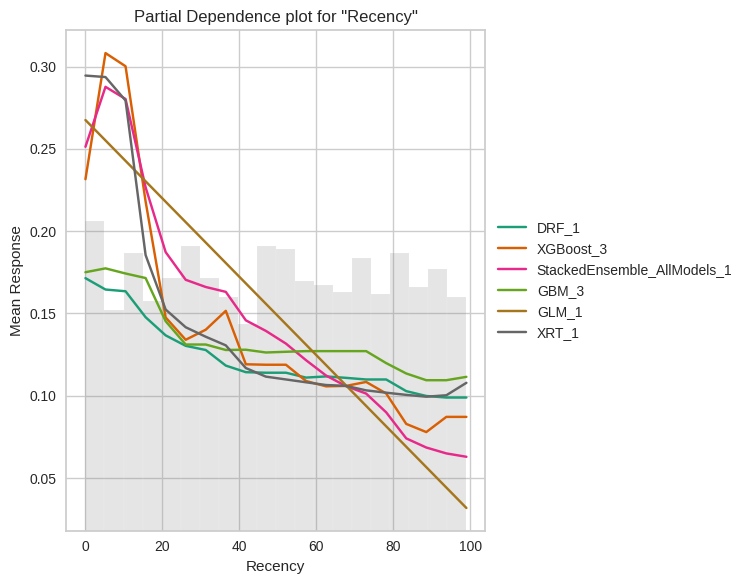

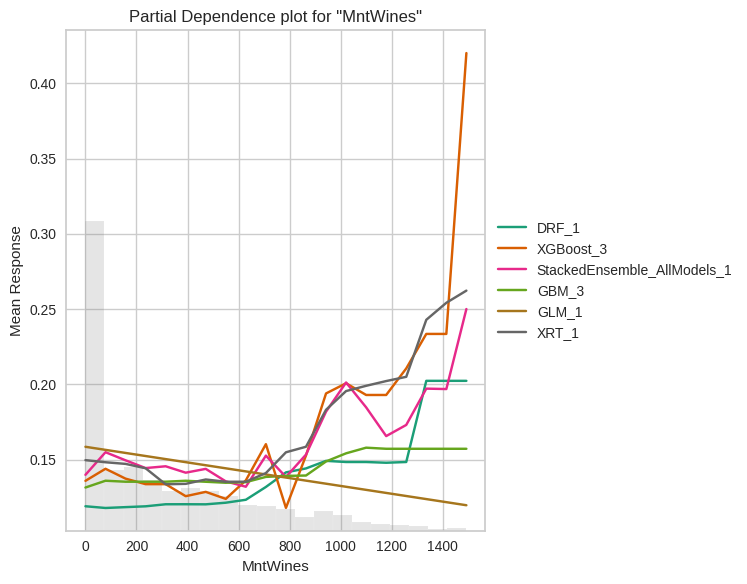

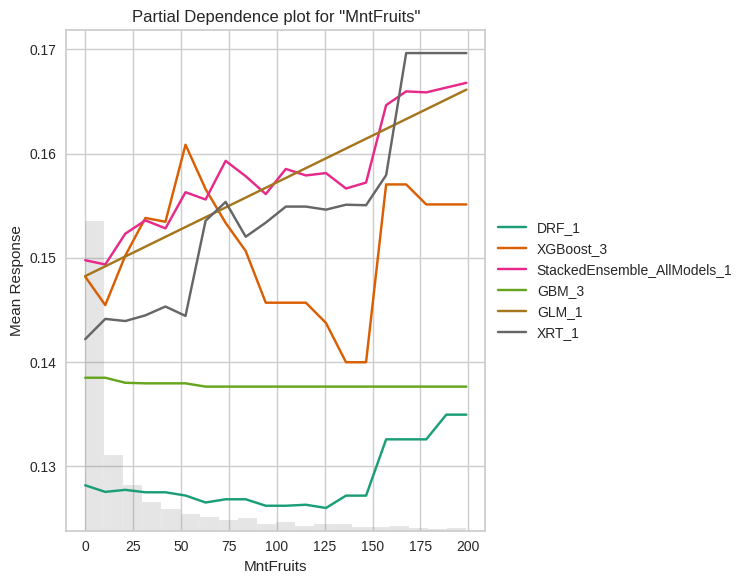

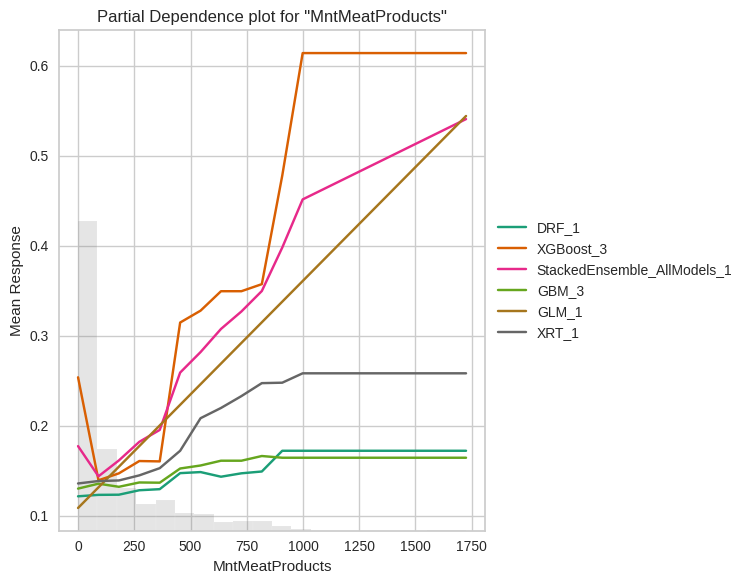

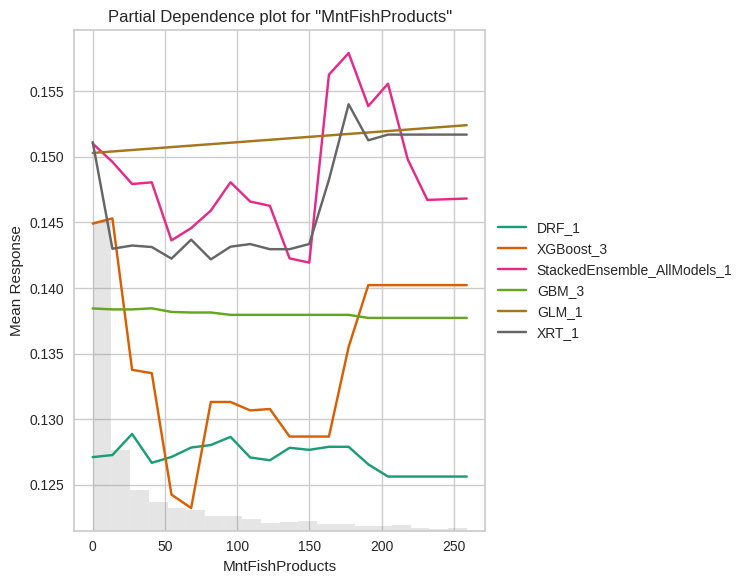

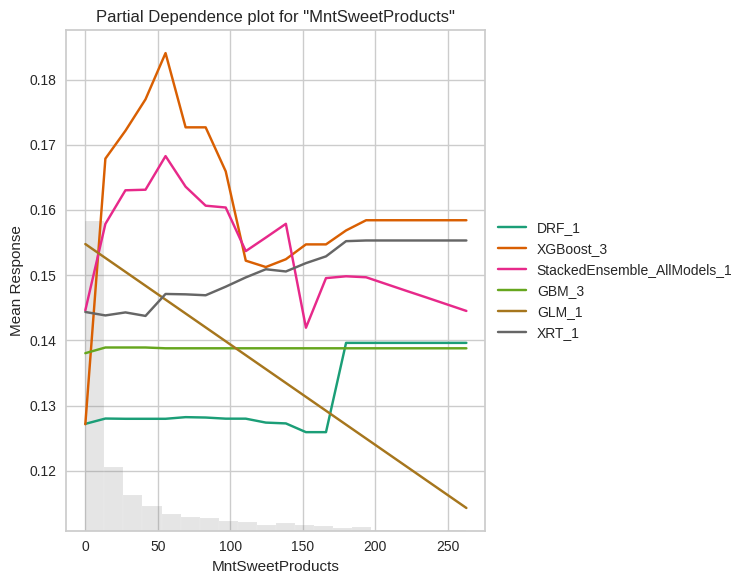

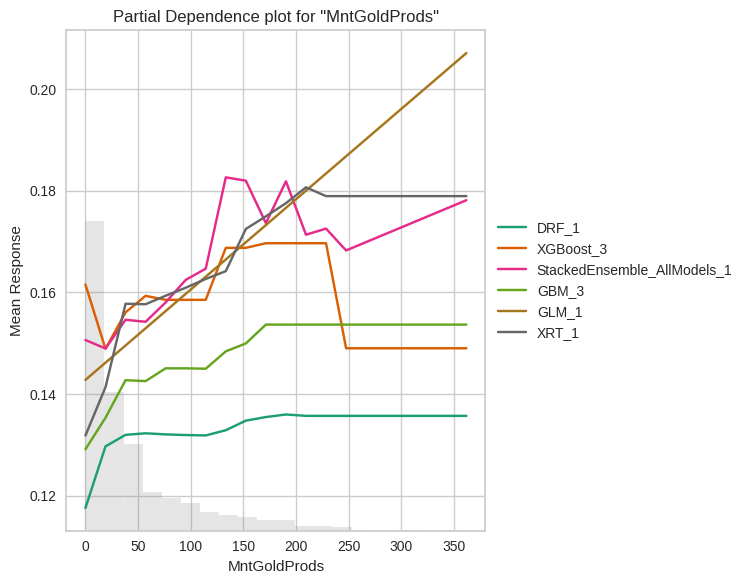

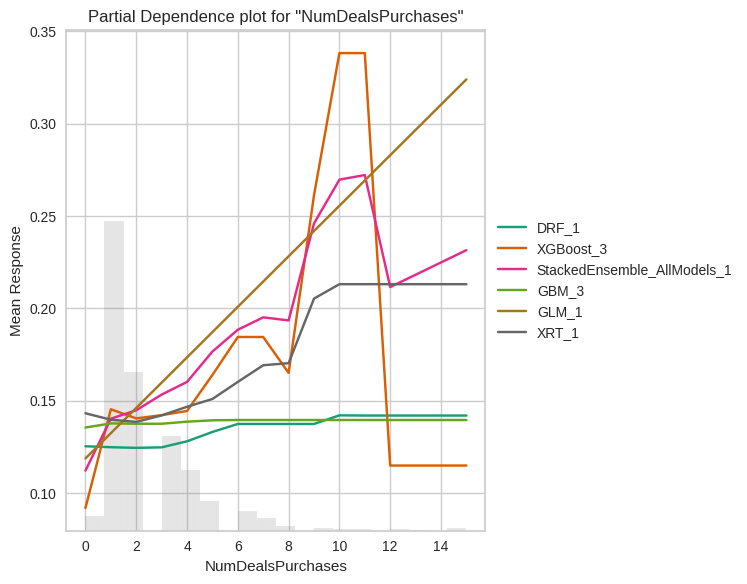

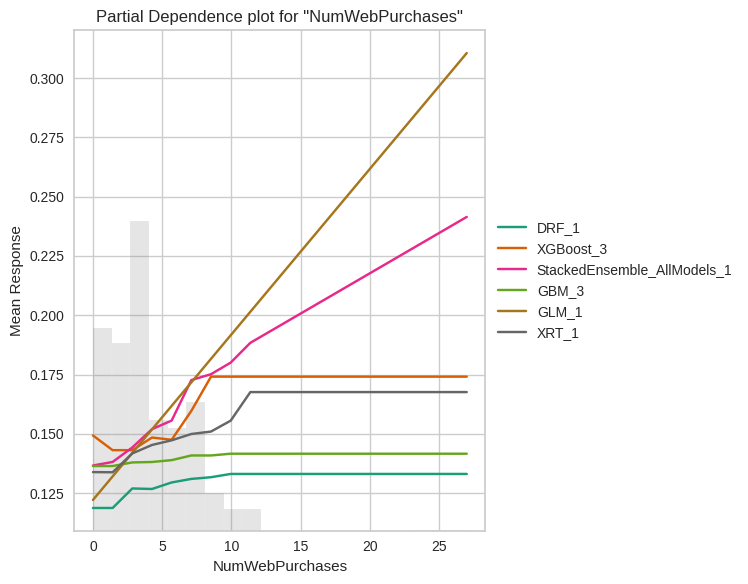

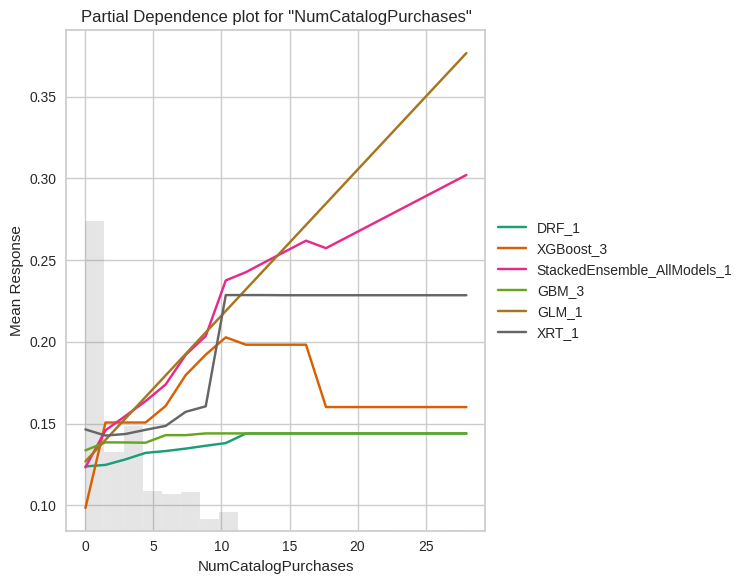

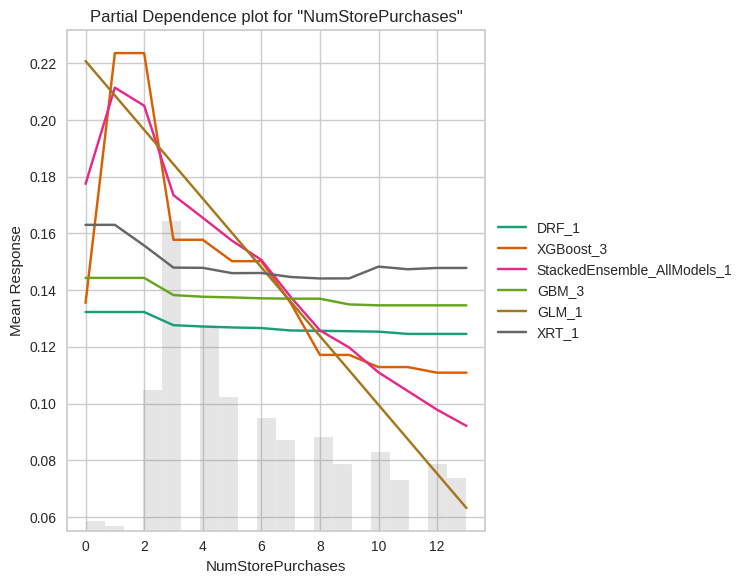

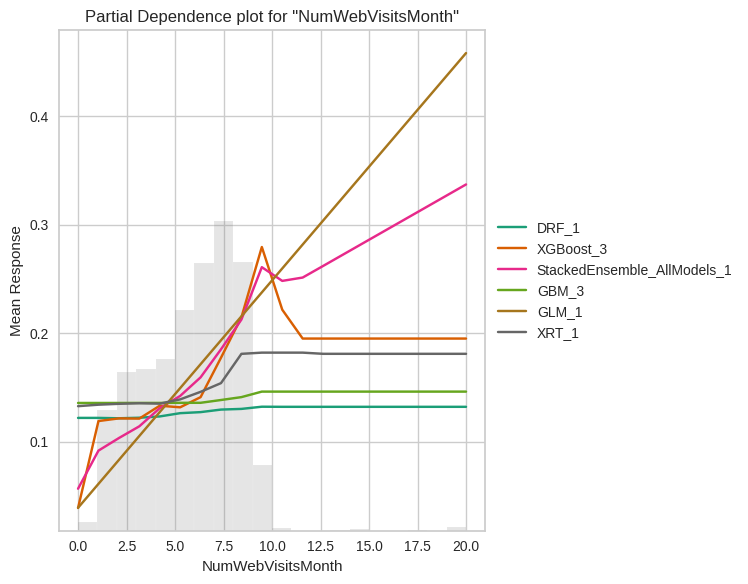

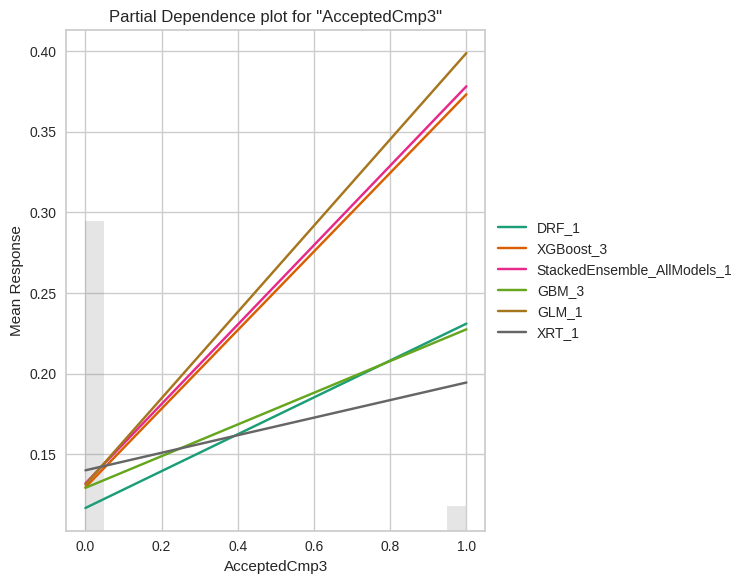

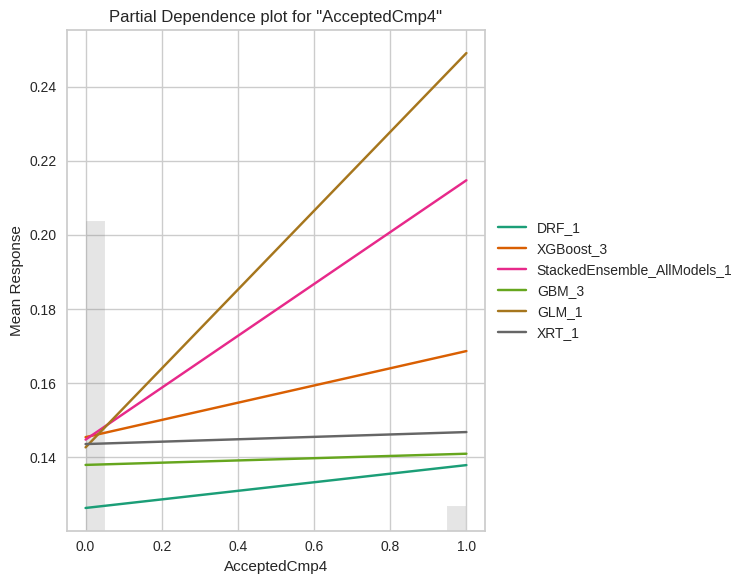

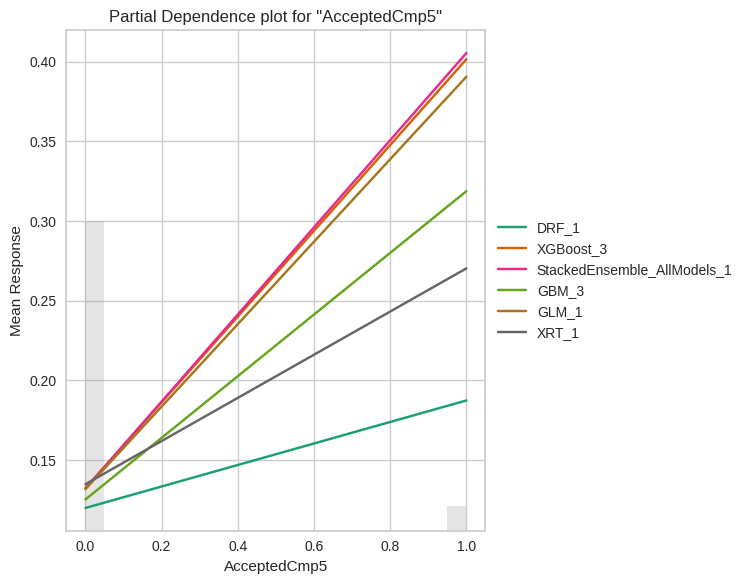

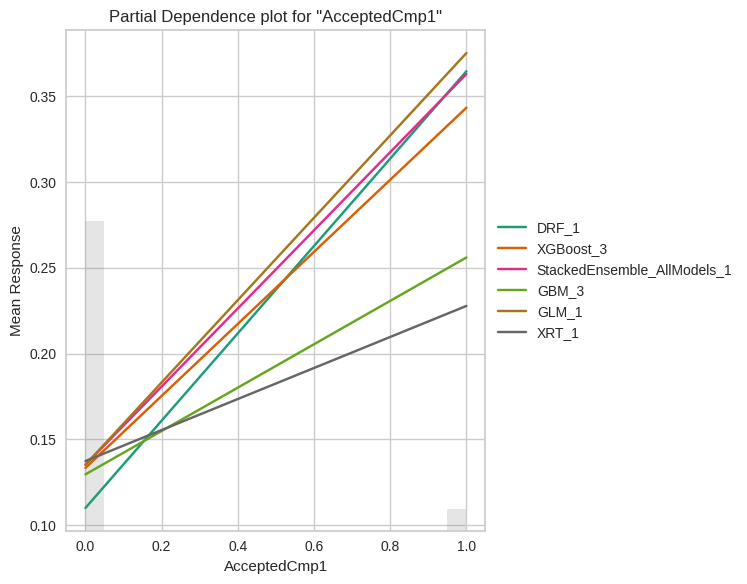

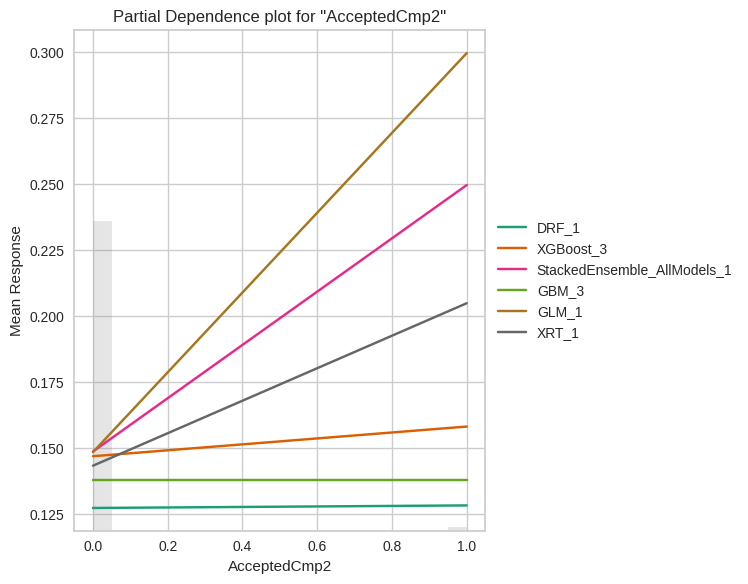

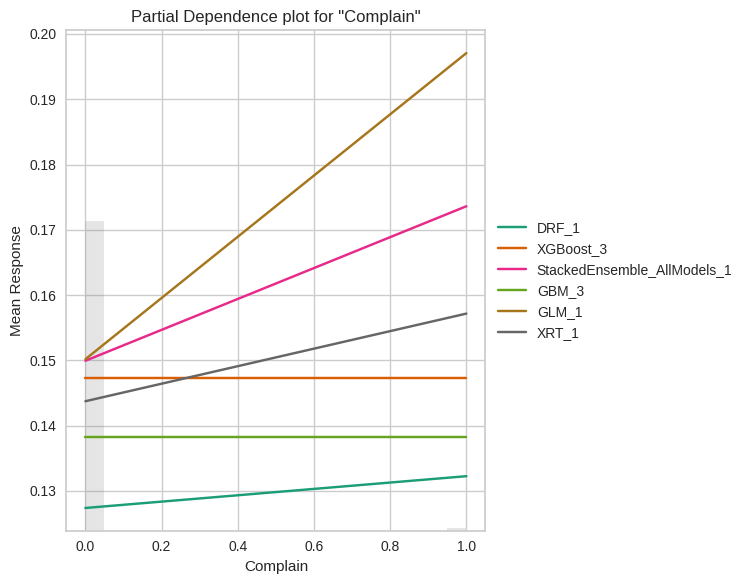

In [47]:
explain_model = aml.explain(frame = dff, figsize = (8,6),include_explanations=['pdp'])

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming you have a pandas DataFrame df with your data and a model fit results
# Let's say your independent variables are stored in X and dependent variable in y

# Convert the H2OFrame to pandas DataFrame
X_pd = X.as_data_frame()

# Check the data types of the columns in X_pd
print(X_pd.dtypes)

# Convert non-numeric columns to appropriate data types if necessary
# For example, you might need to convert categorical variables to dummy variables

# Add a constant to the predictor variable set to include an intercept in the model
X_pd = sm.add_constant(X_pd)

# Fit the OLS model
model = sm.OLS(y, X_pd).fit()

# Get the model's predictions
predictions = model.predict(X_pd)

# Calculate the residuals
residuals = y - predictions

# Plotting the residuals
plt.figure(figsize=(10, 6))

# Residual plot
plt.subplot(1, 2, 1)
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# QQ plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q')

plt.tight_layout()
plt.show()




Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
dtype: object


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

In [60]:
best_model = aml.leader  # Assuming 'automl' is your AutoML object
best_model_params = best_model.params
display(best_model_params)

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_1_20240220_00033',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_1_20240220_00033'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240220_00033_training_py_6_sid_96cc',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240220_00033_training_py_6_sid_96cc'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240220_00033_training_py_6_sid_96cc',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240220_00033_training_py_6_sid_96cc'}},
 'validation_frame': {'default': None, 'actual': None, 'input': None},
 'nfolds': {'default': 0, 'actual': 5, 'input': 5},
 'keep_cross_valid

In [70]:
s = df['Response']
s = s.replace('?', 0)
t = df.drop(['Response'], axis = 1)
t = t.replace('?', 0)
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

train, test = train_test_split (t, s, random_state = 101, test_size = 0.2)

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(test, train)

preds = random_rf.best_estimator_.predict(t_test)

random_rf.best_params_


H2OResponseError: Server error water.exceptions.H2OKeyNotFoundArgumentException:
  Error: Object 'py_185_sid_96cc' not found for argument: key
  Request: GET /3/Frames/py_185_sid_96cc
    params: {'row_count': '10', 'row_offset': '0', 'column_count': '-1', 'full_column_count': '-1', 'column_offset': '0'}


In [75]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Assuming `hmt` is a DataFrame containing features and the response variable 'Response'
hmt = dff.drop(['Education', 'Marital_Status'], axis=1)
h = hmt['Response']
m = hmt.drop(['Response'], axis=1)

# Convert the target variable 'h' to a numpy array
h = np.array(h)

# Convert the features dataframe 'm' to a numpy array
m = np.array(m)

# Split the data into train and test sets
m_train, m_test, h_train, h_test = train_test_split(m, h, random_state=101, test_size=0.2)

# Define the random forest model
mode = RandomForestRegressor()

# Define the parameter grid
param_vals = {
    'max_depth': [200, 500, 800, 1100],
    'n_estimators': [100, 200, 300, 400],
    'min_samples_split': [2, 3, 5]
}

# Initialize RandomizedSearchCV
random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,
                               n_iter=10, scoring='accuracy', cv=3,
                               refit=True, n_jobs=-1)

# Train the model
random_rf.fit(m_train, h_train)

# Make predictions
preds = random_rf.best_estimator_.predict(m_test)

# Get the best parameters
best_param = random_rf.best_params_


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

# ** Q9) Which hyperparameters are important?**

A9) The dataset provided appears to be a tabular dataset containing various columns such as 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', etc. However, hyperparameters are typically associated with machine learning models and algorithms, not with datasets.

To clarify, hyperparameters are parameters that are set prior to the training process and are not learned from the data. They control aspects of the learning process such as the complexity of the model, the optimization algorithm used, and the stopping criteria. Examples of hyperparameters for machine learning algorithms include the number of trees in a random forest, the learning rate in gradient boosting machines, or the regularization parameter in linear models.

# If you're referring to hyperparameters in the context of a specific machine learning algorithm, such as a random forest classifier or regressor, please let me know, and I can provide information on the hyperparameters associated with that algorithm.

# **Q6) Does the model make sense?**

# A6) yes, the qustion is a multiclassfication question and models in AutoML can deal with it.

# **Q10)Coding professionalism?**

# **A10) Yes**

# **Citation**



https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb

MIT License

Copyright (c) [2024] [Ramy Solanki]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS," WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.